# Preprocess, generate "jittered" images and save it

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [2]:
### Data exploration visualization.
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


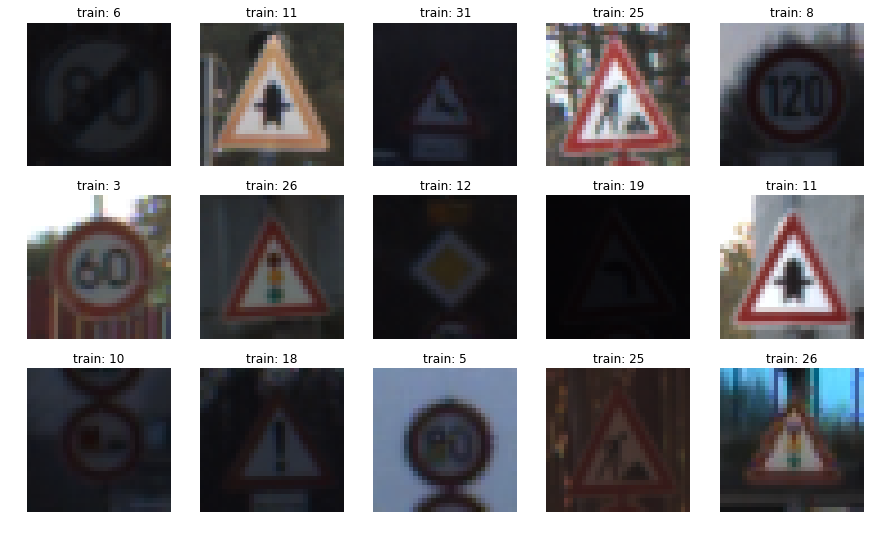

In [3]:
### Data exploration visualization.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#  Plotting traffic sign images
def plotsignal(images, labels, nrows=1, ncols=1, cmap=None, prefix_label = 'label:'):
    """
    Plot images in a subplot arrangement.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)
    labels = 1D array containing the label/class id of the image
    nrows = numbers of rows in the image plot arrangement
    ncols = numbers of columns in the image plot arrangement
    prefix_label = prefix label to show on top of images
    """
    scalesize = 3*nrows*ncols
    f, axarr = plt.subplots(nrows, ncols, figsize=(scalesize/nrows, scalesize/ncols))
    if (nrows != 1) and (ncols != 1): # Take care of error in case nrows/ncols = 1
        axarr = axarr.ravel()
    if (nrows == 1) and (ncols == 1): # Take care of error in case both nrows/ncols = 1
        index = np.random.randint(0, len(images))
        image = images[index].squeeze()
        axarr.axis('off')
        axarr.imshow(image, cmap=cmap)
        axarr.set_title(prefix_label + ' ' + labels[index])
    else:
        for i in range(nrows*ncols):
            index = np.random.randint(0, len(images))
            image = images[index].squeeze()
            axarr[i].axis('off')
            axarr[i].imshow(image, cmap=cmap)
            axarr[i].set_title(prefix_label + ' ' + str(labels[index]))

nrows = 3 # change it here the way you want, 0 will give error
ncols = 5 # change it here the way you want, 0 will give error
plotsignal(X_train, y_train, nrows, ncols, cmap=None, prefix_label = 'train:')

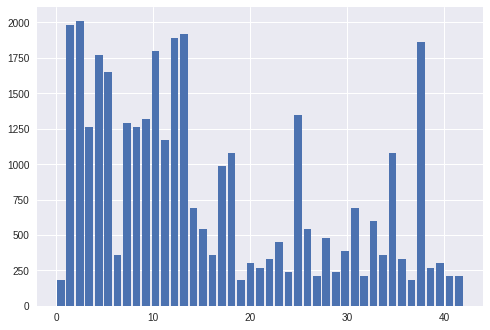

In [4]:
# Enlarge Inline Pictures
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = "14, 8" # or  whatever you want

# Plotting the count of each sign
import seaborn as sns
n, bins, patches = plt.hist(y_train, bins=n_classes, rwidth=0.8)

Train RGB shape: (34799, 32, 32, 3)
Train Grayscale shape: (34799, 32, 32, 1)
Validation RGB shape: (4410, 32, 32, 3)
Validation Grayscale shape: (4410, 32, 32, 1)
Test RGB shape: (12630, 32, 32, 3)
Test Grayscale shape: (12630, 32, 32, 1)


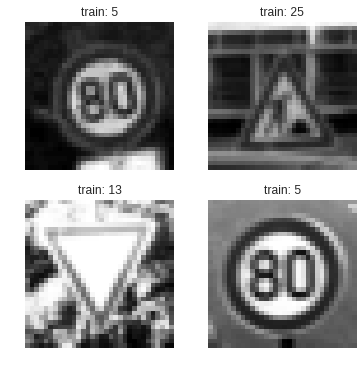

In [5]:
# rgb to grayscale
# recommended by Pierre Sermanet and Yann LeCun paper
# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
# "Experiments conducted after phase 1 produced a new record of 99.17% by increasing the network capacity,
# and by using greyscale images instead of color"
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def grayscalebatch(images):
    """
    Convert the whole batch of features images to grayscale and keep depth of 3 channels.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)    
    """
    # Initialize grayscale 4D outputs
    #images_gray = np.zeros_like(images) # to return 3 channels
    images_gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1], 1]) # to return 1 channels
    
    # Initialize grayscale temporary 3D variables
    gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1]])

    # Loop on each image
    for i in range(len(images)):
        gray[i] = grayscale(images[i]) 

    # Copy same grayscale image on each of 3 channels
    #images_gray[:,:,:,0] = gray # to return 3 channels
    #images_gray[:,:,:,1] = gray # to return 3 channels
    #images_gray[:,:,:,2] = gray # to return 3 channels
    images_gray[:,:,:,0] = gray # to return 1 channels
    
    
    return images_gray
        
    
# Convert images to grayscale 4D outputs
X_train_rgb = X_train.copy()
X_validation_rgb = X_validation.copy()
X_test_rgb = X_test.copy()

X_train_gray = grayscalebatch(X_train_rgb)
X_validation_gray = grayscalebatch(X_validation_rgb)
X_test_gray = grayscalebatch(X_test_rgb)

# Check shapes
print('Train RGB shape:', X_train_rgb.shape)
print('Train Grayscale shape:', X_train_gray.shape)
print('Validation RGB shape:', X_validation_rgb.shape)
print('Validation Grayscale shape:', X_validation_gray.shape)
print('Test RGB shape:', X_test_rgb.shape)
print('Test Grayscale shape:', X_test_gray.shape)

# Check images
nrows = 2 # change it here the way you want, 0 will give error
ncols = 2 # change it here the way you want, 0 will give error
plotsignal(X_train_gray, y_train, nrows, ncols, cmap='gray', prefix_label = 'train:')

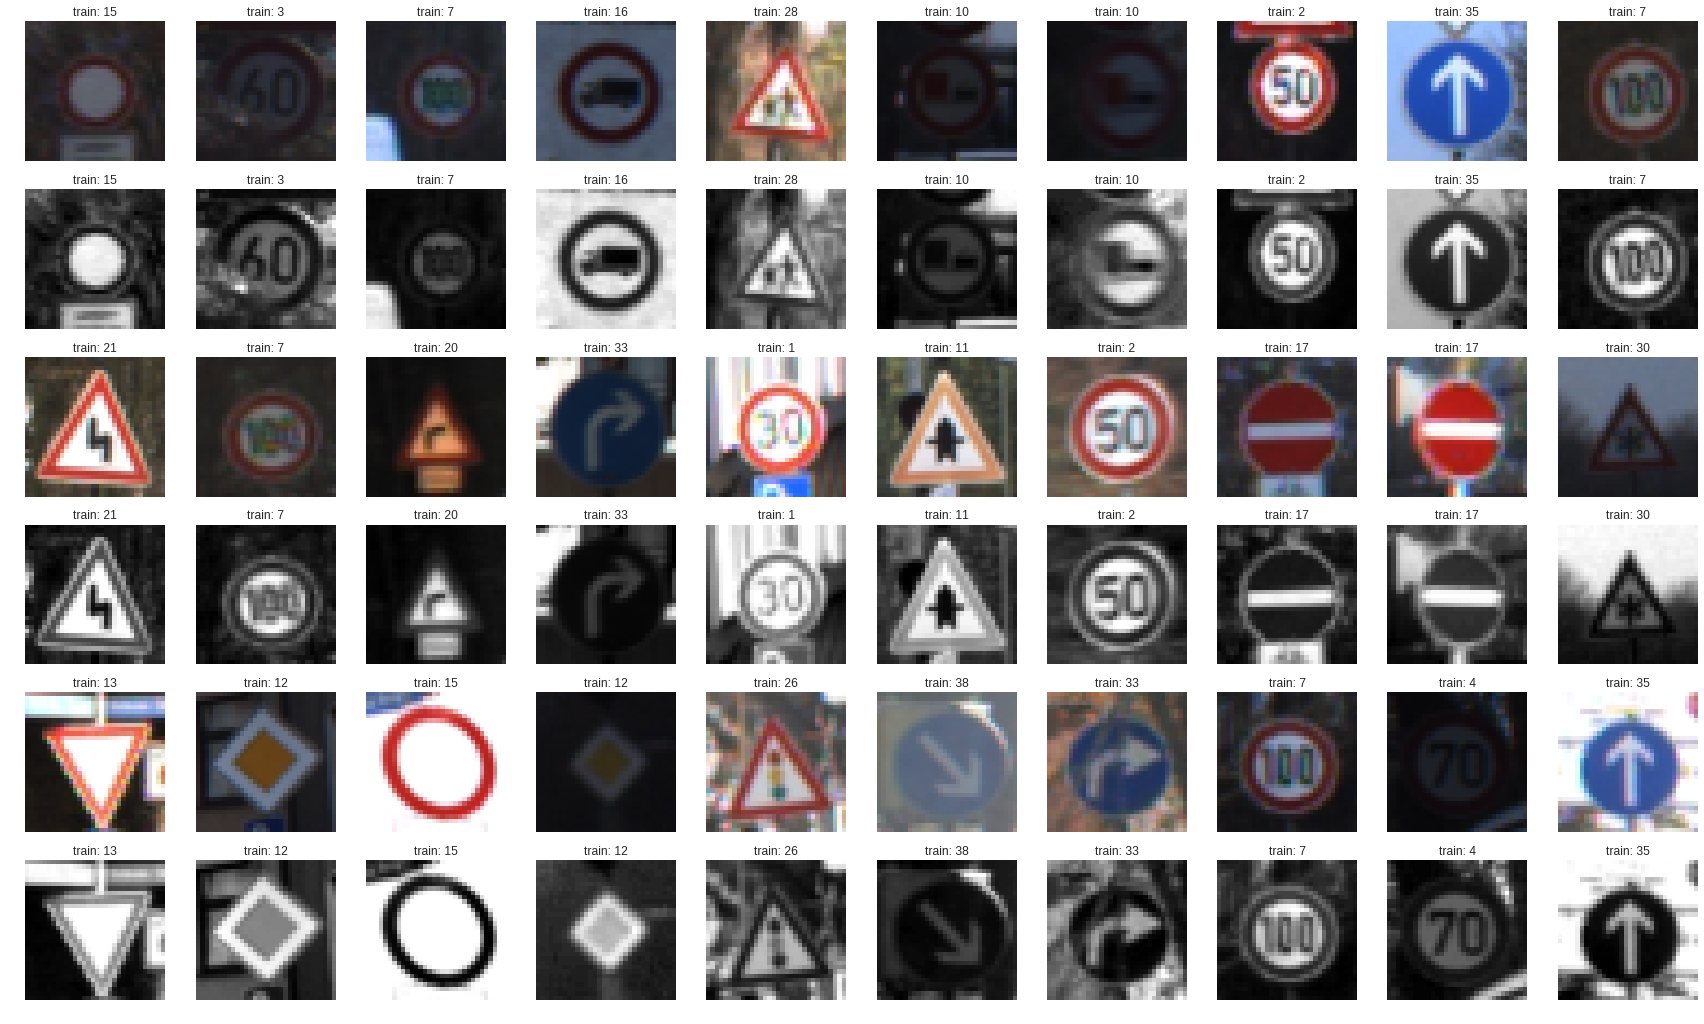

In [6]:
# Visualize rgb vs grayscale
def rgb_vs_gray_plotsignal(images, images_gray, labels, nrows=1, ncols=1, prefix_label = 'label:'):
    """
    Plot images in a subplot arrangement.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)
    images_gray = 4D array containing raw pixel data of the images in grayscale, (num examples, width, height, channels)
    labels = 1D array containing the label/class id of the image
    nrows = numbers of rows in the image plot arrangement
    ncols = numbers of columns in the image plot arrangement
    prefix_label = prefix label to show on top of images
    """

    scalesize = 3*nrows*2*ncols    
    f, axarr = plt.subplots(nrows*2, ncols, figsize=(scalesize/(2*nrows), scalesize/ncols))    
    axarr = axarr.ravel()
    for j in range(1,nrows+1):
        for i in range(ncols): 
            index = np.random.randint(0, len(images))
            image = images[index].squeeze()
            k = i + 2*ncols*(j-1)
            axarr[k].axis('off')
            axarr[k].imshow(image)
            axarr[k].set_title(prefix_label + ' ' + str(labels[index]))
            
            image = images_gray[index].squeeze()
            k = i + 2*ncols*(j-1) + ncols
            axarr[k].axis('off')
            axarr[k].imshow(image, cmap='gray')
            axarr[k].set_title(prefix_label + ' ' + str(labels[index]))
    
nrows = 3 # change it here the way you want, 0 will give error
ncols = 10 # change it here the way you want, 0 will give error
rgb_vs_gray_plotsignal(X_train_rgb, X_train_gray, y_train, nrows, ncols, prefix_label = 'train:')

In [7]:
# Finalize grayscale convertion
X_train = X_train_gray
X_validation = X_validation_gray
X_test = X_test_gray

In [8]:
# Checking the sequence/order of the images by id
print('Sequence of images by id:\n', y_train[0:300], '\n')

# Check mean and std of data
print('train: mean, std ', np.mean(X_train), np.std(X_train))
print('validation: mean, std ', np.mean(X_validation), np.std(X_validation))
print('test: mean, std ', np.mean(X_test), np.std(X_test))

Sequence of images by id:
 [41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31] 

train: mean, std  81.9172385241 66.1343973937
validation: 

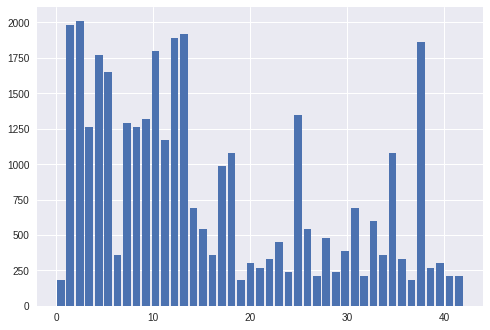

In [9]:
# histogram of label frequency (once again, before data augmentation)
n, bins, patches = plt.hist(y_train, bins=n_classes, rwidth=0.8)

In [11]:
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))
print("maximum samples for any label:", max(np.bincount(y_train)))
print("average samples for any label:", np.average(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180
maximum samples for any label: 2010
average samples for any label: 809.279069767


shape in/out: (32, 32, 1) (32, 32, 1)


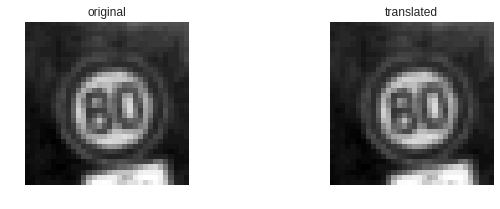

In [12]:
def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train[13243]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


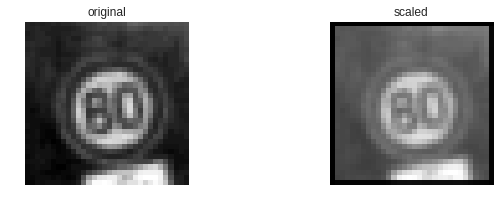

In [13]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


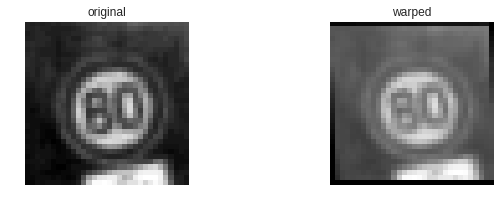

In [14]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


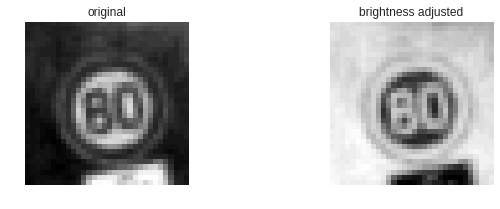

In [15]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

In [16]:
print('X, y shapes:', X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|-

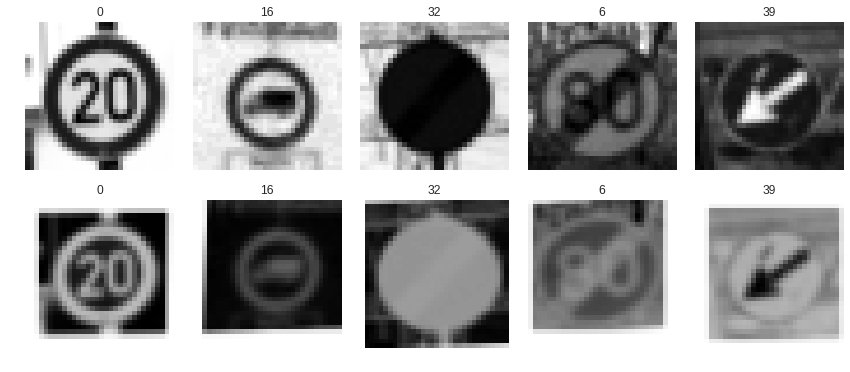

In [17]:
# show comparisons of 5 random augmented data points
choices = list(range(len(input_indices)))
picks = []
for i in range(5):
    rnd_index = np.random.randint(low=0,high=len(choices))
    picks.append(choices.pop(rnd_index))
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(5):
    image = X_train[input_indices[picks[i]]].squeeze()
    axs[i].axis('off')
    axs[i].imshow(image, cmap = 'gray')
    axs[i].set_title(y_train[input_indices[picks[i]]])
for i in range(5):
    image = X_train[output_indices[picks[i]]].squeeze()
    axs[i+5].axis('off')
    axs[i+5].imshow(image, cmap = 'gray')
    axs[i+5].set_title(y_train[output_indices[picks[i]]])

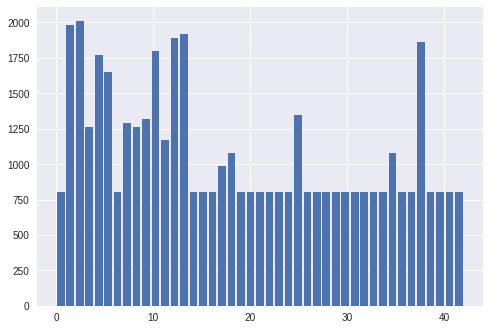

In [18]:
# histogram of label frequency
n, bins, patches = plt.hist(y_train, bins=n_classes, rwidth=0.8)

In [19]:
# Record augmented data
aug_train = {'features': X_train,
             'labels': y_train}
aug_val = {'features': X_validation,
             'labels': y_validation}
aug_test = {'features': X_test,
             'labels': y_test}
pickle.dump(aug_train, open( "/media/ricardo/MyFiles/my-augmented-data/aug_train.p", "wb" ) )
pickle.dump(aug_val, open( "/media/ricardo/MyFiles/my-augmented-data/aug_val.p", "wb" ) )
pickle.dump(aug_test, open( "/media/ricardo/MyFiles/my-augmented-data/aug_test.p", "wb" ) )

print('done')

done
